In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
keras.backend.clear_session()  # For easy reset of Jupyter notebook

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# train_images.shape is (60000, 28, 28)
#test_images.shape (10000, 28, 28)
num_pixels = 28 * 28 
train_images = train_images.reshape( (60000, num_pixels) ).astype(np.float32) / 255.0
test_images = test_images.reshape( (10000, num_pixels) ).astype(np.float32)  / 255.0

In [3]:
# this uses the sequential model
model = keras.Sequential([
    keras.layers.Input(shape=(num_pixels,),name='input'),
    keras.layers.Dense(128, activation='relu', name='hidden1'),
    keras.layers.Dense(10, activation='softmax', name='output')
])

#this will print a summary of the model to the screen
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 128)               100480    
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


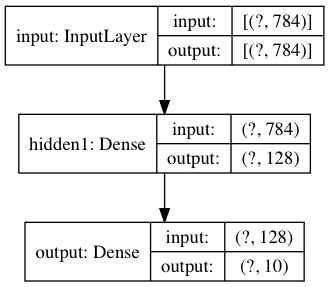

In [4]:
# this will produce a digram of the model -- requires pydot and graphviz installed (pip install pydot graphviz)
# may need to update graphviz package first (Mac: brew install graphviz/Linux: sudo apt-get install graphviz)
keras.utils.plot_model(model, to_file='model_sequential.png', show_shapes=True, show_layer_names=True)

In [5]:
opt_sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9) 
loss_scc = keras.losses.SparseCategoricalCrossentropy()
model.compile(loss=loss_scc, optimizer=opt_sgd, metrics=['accuracy']) 

results = model.fit(train_images,  train_labels, batch_size=32, epochs=25, validation_split=0.1)

# using a .hdf5 or .h5 extension saves the model in format compatible with older keras
model.save('fmnist_seq_trained.hdf5')

# plot our learning curves
#results.history is a dictionary
loss = results.history['loss']
val_loss = results.history['val_loss']
acc = results.history['accuracy']
val_acc = results.history['val_accuracy']


Train on 54000 samples, validate on 6000 samples
Epoch 1/25
54000/54000 [==============================] - 3s 59us/sample - loss: 0.5342 - accuracy: 0.8129 - val_loss: 0.4229 - val_accuracy: 0.8455
Epoch 2/25
54000/54000 [==============================] - 3s 50us/sample - loss: 0.3966 - accuracy: 0.8569 - val_loss: 0.3743 - val_accuracy: 0.8648
Epoch 3/25
54000/54000 [==============================] - 3s 49us/sample - loss: 0.3615 - accuracy: 0.8695 - val_loss: 0.4427 - val_accuracy: 0.8325
Epoch 4/25
54000/54000 [==============================] - 3s 51us/sample - loss: 0.3371 - accuracy: 0.8769 - val_loss: 0.3665 - val_accuracy: 0.8743
Epoch 5/25
54000/54000 [==============================] - 3s 53us/sample - loss: 0.3197 - accuracy: 0.8815 - val_loss: 0.3424 - val_accuracy: 0.8782
Epoch 6/25
54000/54000 [==============================] - 3s 53us/sample - loss: 0.3049 - accuracy: 0.8887 - val_loss: 0.3347 - val_accuracy: 0.8802
Epoch 7/25
54000/54000 [==============================] -

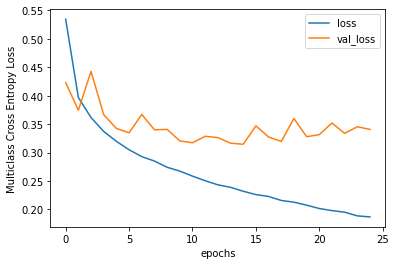

In [8]:
epochs = np.arange(len(loss))
plt.figure()
plt.plot(epochs, loss, label='loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.xlabel('epochs')
plt.ylabel('Multiclass Cross Entropy Loss')
plt.legend()
plt.savefig('learning_loss_seq.png', dpi=256)

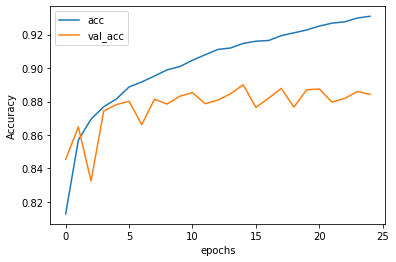

In [9]:
plt.figure()
plt.plot(epochs, acc, label='acc')
plt.plot(epochs, val_acc, label='val_acc')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('learning_acc_seq.png', dpi=256)